<a href="https://colab.research.google.com/github/Keerthi-Dhatrika/Bank-Loan-Customer-Analysis/blob/main/Bank_loan_of_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("/content/Finance_1.csv")
df2 = pd.read_excel("/content/Finance_2.xlsx")

In [3]:
df = pd.merge(df1, df2, on="id", how="inner")

In [5]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y', errors='coerce')
df['year'] = df['issue_d'].dt.year
df['month'] = df['issue_d'].dt.month

/tmp/ipython-input-8-3106541320.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_loan, x="year", y="loan_amnt", palette="viridis")


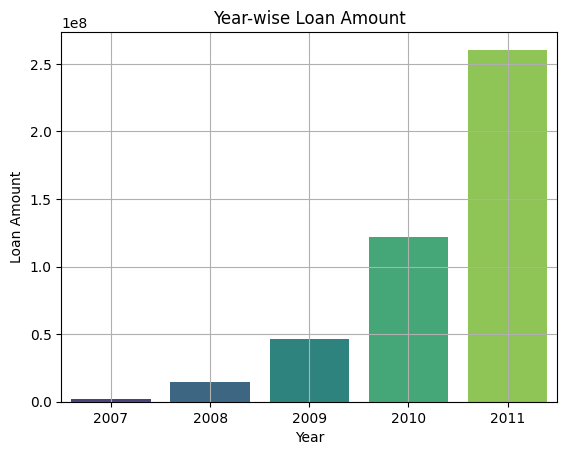

In [8]:
yearly_loan = df.groupby("year")["loan_amnt"].sum().reset_index()
sns.barplot(data=yearly_loan, x="year", y="loan_amnt", palette="viridis")
plt.title("Year-wise Loan Amount")
plt.xlabel("Year")
plt.ylabel("Loan Amount")
plt.grid(True)
plt.show()

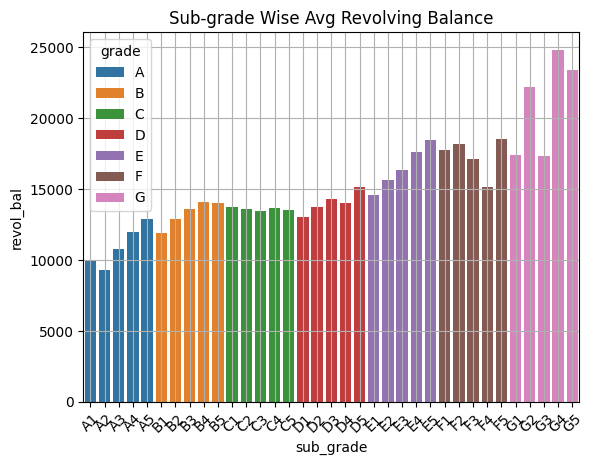

In [9]:
grade_sub_revol = df.groupby(["grade", "sub_grade"])["revol_bal"].mean().reset_index()
sns.barplot(data=grade_sub_revol, x="sub_grade", y="revol_bal", hue="grade")
plt.title("Sub-grade Wise Avg Revolving Balance")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/tmp/ipython-input-11-3535313158.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=verify_pay, x="verification_status", y="total_pymnt", palette="pastel")


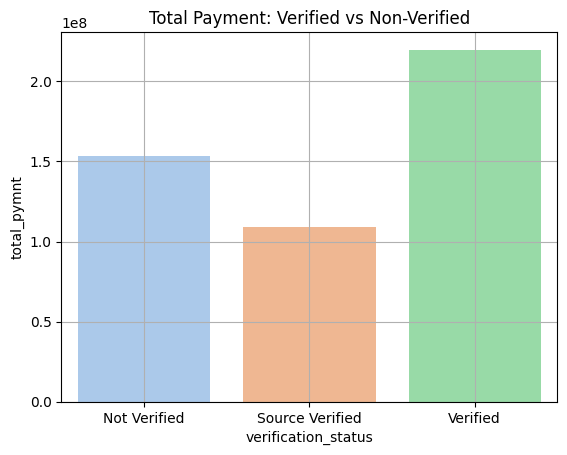

In [11]:
verify_pay = df.groupby("verification_status")["total_pymnt"].sum().reset_index()
sns.barplot(data=verify_pay, x="verification_status", y="total_pymnt", palette="pastel")
plt.title("Total Payment: Verified vs Non-Verified")
plt.grid(True)
plt.show()

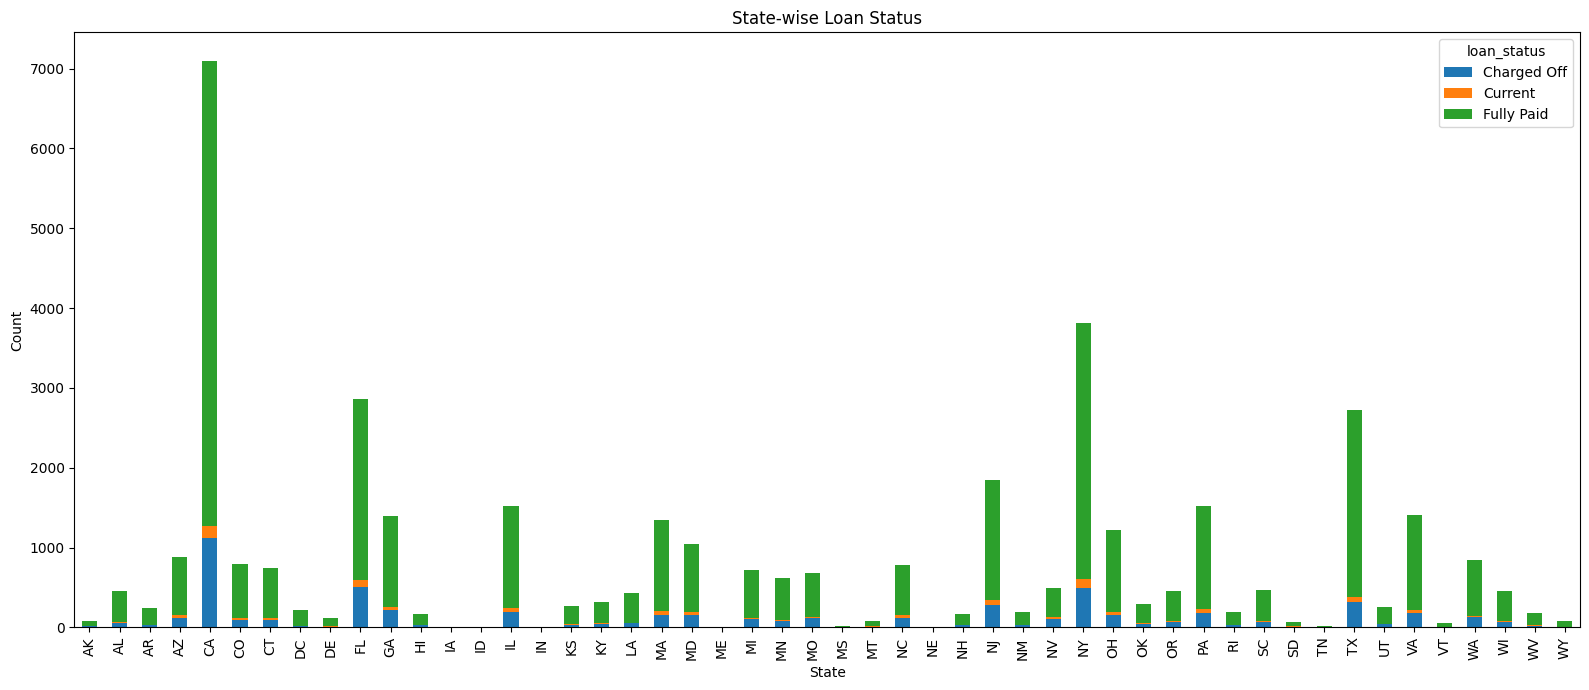

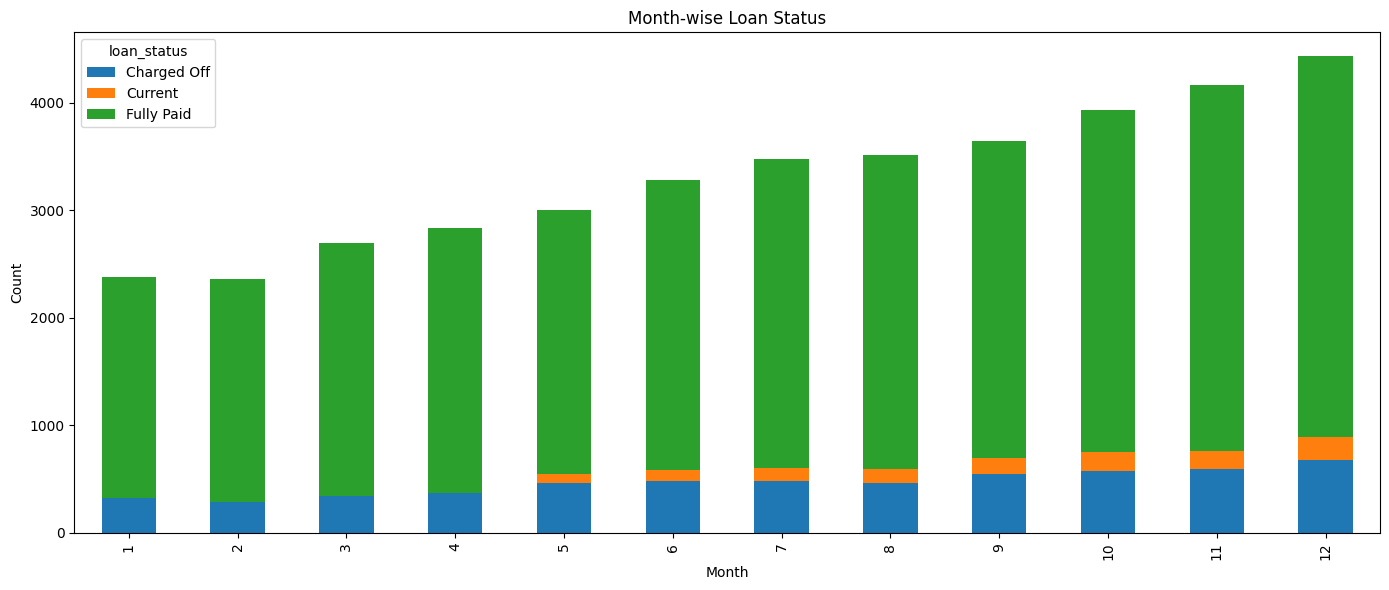

In [12]:
state_loan = df.groupby("addr_state")["loan_status"].value_counts().unstack().fillna(0)
state_loan.plot(kind="bar", stacked=True, figsize=(16,7))
plt.title("State-wise Loan Status")
plt.xlabel("State")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

month_loan = df.groupby("month")["loan_status"].value_counts().unstack().fillna(0)
month_loan.plot(kind="bar", stacked=True, figsize=(14,6))
plt.title("Month-wise Loan Status")
plt.xlabel("Month")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

/tmp/ipython-input-13-777765666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ownership_group, x="home_ownership", y="last_pymnt_amnt", palette="Set2")


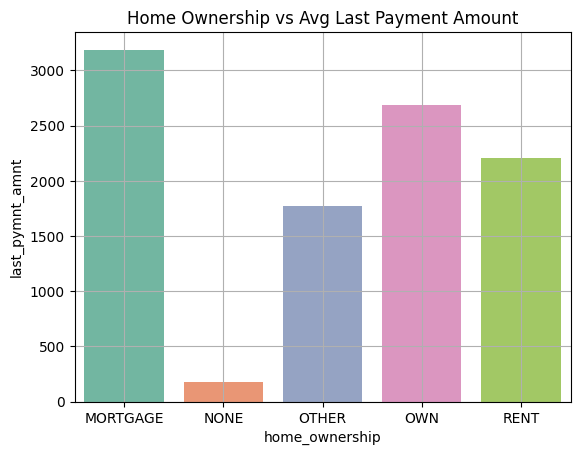

In [13]:
ownership_group = df.groupby("home_ownership")["last_pymnt_amnt"].mean().reset_index()
sns.barplot(data=ownership_group, x="home_ownership", y="last_pymnt_amnt", palette="Set2")
plt.title("Home Ownership vs Avg Last Payment Amount")
plt.grid(True)
plt.show()